# PC Test Environ Maker

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng, 1)
for n in range(4):
    ng.new_node()

ng.new_node(mal=True, watch=w)

for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

ng.nodes[-1].issue_bad_transaction()
PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
w.update()
ng.nodes[-1].spam_transactions(10)
badNode = ng.nodes[-1]
print(badNode.chain)

for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001C8BAF90AA0>]
Edges []
Node IDS [0]
Weights [[0, 806, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001C8BAF90AA0>, <tangle.node object at 0x000001C8B9AF5E80>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 806, 1], [1, 38, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001C8BAF90AA0>, <tangle.node object at 0x000001C8B9AF5E80>, <tangle.node object at 0x000001C89A61FAA0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 806, 1], [1, 38, 1], [2, 848, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001C8BAF90AA0>, <tangle.node object at 0x000001C8B9AF5E80>, <tangle.node object at 0x000001C89A61FAA0>, <tangle.node object at 0x000001C89A61F920>]
Edges [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 806, 1], [1, 38, 1], [2, 848, 1], [3, 720, 1]]
Finished updating


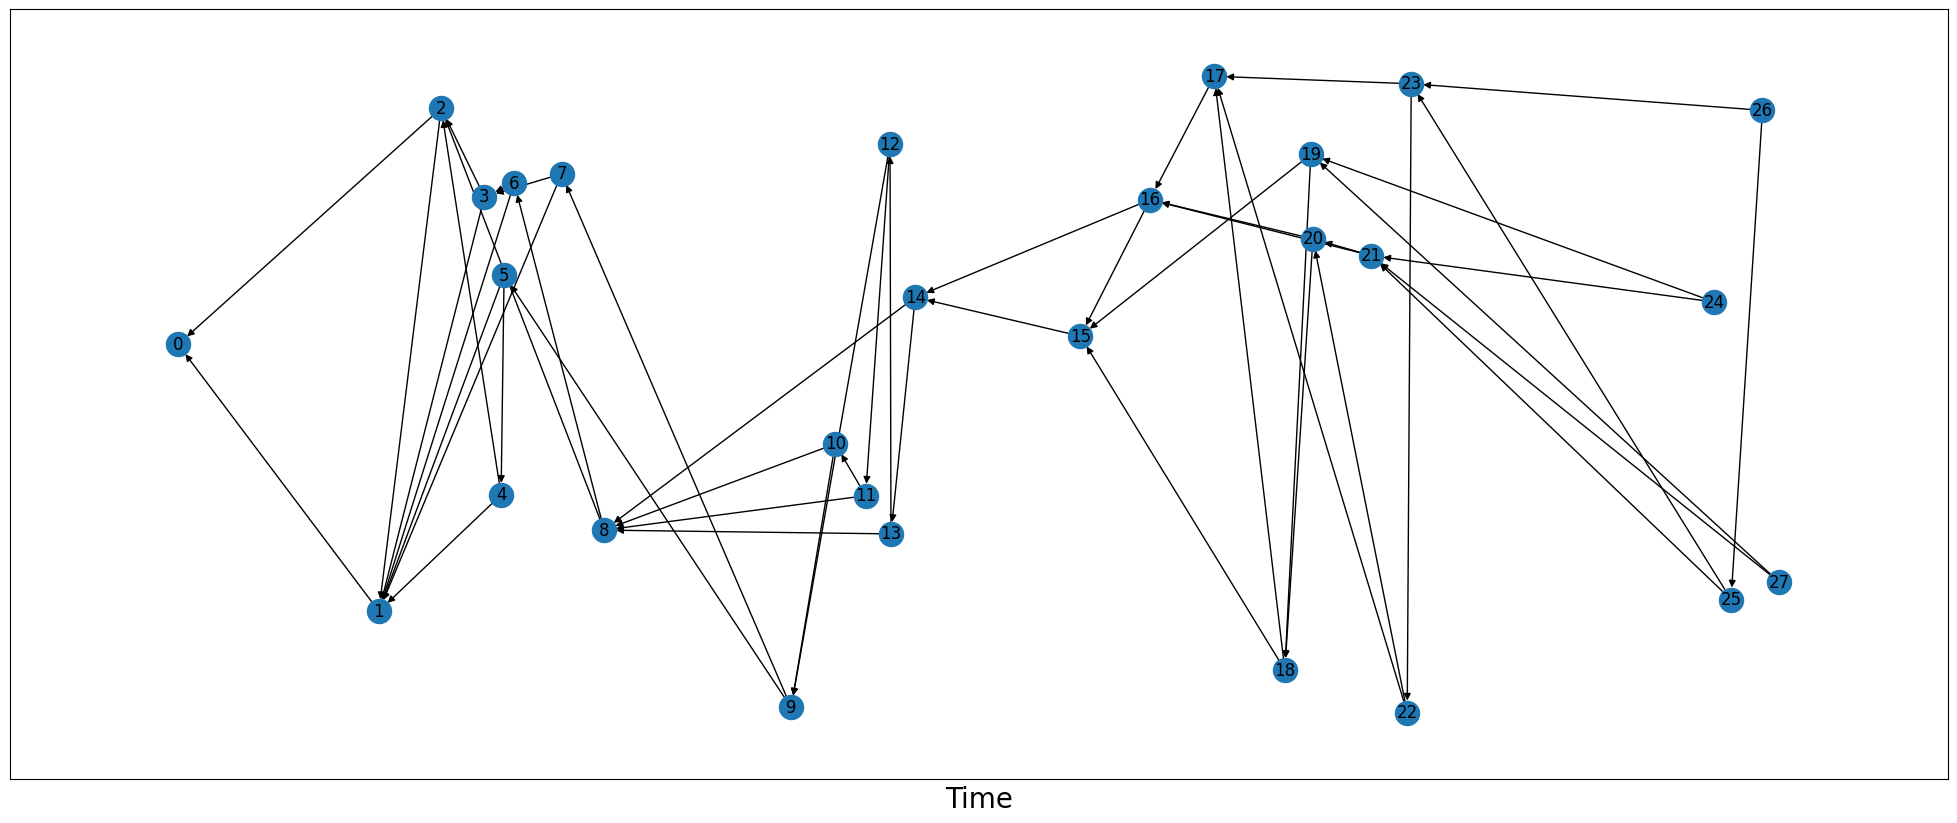

In [3]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 6, 7, 7, 9, 9, 12, 12, 18, 19, 19, 19] [1.0, 1.2382518086398597, 1.6227995864272486, 1.889725692090149, 1.9924352472372615, 2.010846329716469, 2.0732554518941293, 2.365214578169133, 2.628265974393617, 3.7818128552195356, 4.053886559391121, 4.2411576734349286, 4.391882755543862, 4.397629552097222, 4.547398942617188, 5.566205173175925, 5.995277356113216, 6.39239403833726, 6.827436482727359, 6.987948059895862, 7.000824892191704, 7.361286926846726, 7.582450772096728, 7.60720630427326, 9.47744624746766, 9.580167848362295, 9.774203906537624, 9.87835775714971]
3.7818128552195356


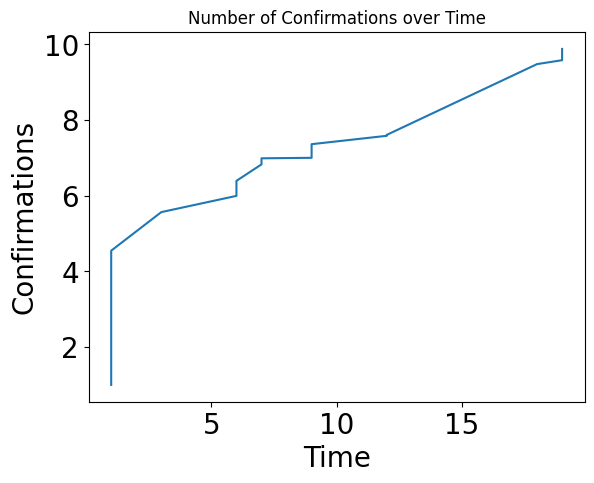

In [4]:
w.plot_confirm_over_time()
print(PC_issue_time)
w.output_to_sheet()

In [5]:
a = analyser()
a.get_res(1)

[1.2, 1, 1, 1]
[1.6, 1, 1, 2]
[1.9, 1, 1, 3]
[2.0, 1, 1, 4]
[2.0, 1, 'Fuck', 4]
[2.1, 1, 1, 5]
[2.4, 1, 1, 6]
[2.6, 1, 1, 7]
[3.8, 1, 1, 8]
[4.1, 1, 1, 9]
[4.2, 1, 1, 10]
[4.4, 1, 1, 11]
[4.4, 1, 'Fuck', 11]
[4.5, 1, 1, 12]
[5.6, 3, 1, 13]
[6.0, 6, 1, 14]
[6.4, 6, 1, 15]
[6.8, 7, 1, 16]
[7.0, 7, 1, 17]
[7.0, 9, 'Fuck', 17]
[7.4, 9, 1, 18]
[7.6, 12, 1, 19]
[7.6, 12, 'Fuck', 19]
[9.5, 18, 1, 20]
[9.6, 19, 1, 21]
[9.8, 19, 1, 22]
[9.9, 19, 1, 23]
[[1.0, 1, 1], [1.2, 1, 1], [1.6, 1, 1], [1.9, 1, 1], [2.0, 1.0, 2], [2.1, 1, 1], [2.4, 1, 1], [2.6, 1, 1], [3.8, 1, 1], [4.1, 1, 1], [4.2, 1, 1], [4.4, 1.0, 2], [4.5, 1, 1], [5.6, 3, 1], [6.0, 6, 1], [6.4, 6, 1], [6.8, 7, 1], [7.0, 8.0, 2], [7.4, 9, 1], [7.6, 12.0, 2], [9.5, 18, 1], [9.6, 19, 1], [9.8, 19, 1], [9.9, 19, 1]]


### Non-PC Tangle

In [6]:
t2 = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng2 = node_graph(t2)
w2 = watcher(t2, ng2)

for n in range(4):
    ng2.new_node()


for j in range(9):
    for i in range(4):
        ng2.nodes[i].issue_transaction()
        w2.update()

TypeError: watcher.__init__() missing 1 required positional argument: 'ID'

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 8, 9, 10, 10, 12, 12, 12, 13, 13, 13, 13, 14, 18, 18, 18, 18, 18, 19] [1.0, 1.3635998134339955, 1.5170040730776422, 2.4879607629742155, 2.6224496602635408, 3.4078289789904574, 3.4859022761649716, 3.76546265082907, 4.215803487989734, 4.6843774844683725, 5.193013883172916, 5.214803562629376, 5.227519816957412, 5.612414284348816, 6.144493228855147, 6.333234696453134, 6.609983185091526, 7.279647412640677, 7.554216808174215, 8.431309233559531, 8.860165852024537, 8.966723599564899, 9.511876544356038, 9.726277325069534, 10.153411367539347, 10.868102187247343, 11.125644682118487, 11.458894333881934, 11.58650490628529, 11.85993563320027, 13.093998371858733, 13.135181899260608, 13.409384163988602, 13.46906692955373, 13.572141337697316, 13.845462107425403, 13.970448681520072]


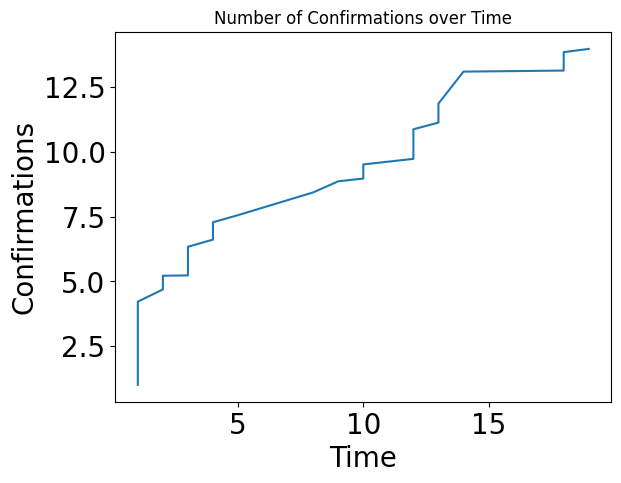

In [ ]:
w2.plot_confirm_over_time()